In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

#IMPRESION DE RUTAS DE IMAGENES POR PANTALLA
'''from PIL import Image
import matplotlib.pyplot as plt
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
contador = 0
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        images = os.path.join(dirname, filename)      
        'print(images)'
for image in images:
    img = Image.open('image')
    fig = plt.figure()
    plt.imshow(img)
'''
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

'from PIL import Image\nimport matplotlib.pyplot as plt\nimport numpy as np # linear algebra\nimport pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)\n# Input data files are available in the read-only "../input/" directory\n# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory\n\nimport os\ncontador = 0\nfor dirname, _, filenames in os.walk(\'/kaggle/input\'):\n    for filename in filenames:\n        images = os.path.join(dirname, filename)      \n        \'print(images)\'\nfor image in images:\n    img = Image.open(\'image\')\n    fig = plt.figure()\n    plt.imshow(img)\n'

In [2]:
#IMPRESION DE IMAGENES POR PANTALLA

'''import cv2
import os

input_images_path = "/kaggle/input"
files_names = os.listdir(input_images_path)
print(files_names)

output_images_path = "C:/Users/acast/OneDrive/Escritorio/PROYECTO IA/imagenes"
if not os.path.exists(output_images_path):
    os.makedirs(output_images_path)
    print("Directorio creado: ", output_images_path)

count = 0
for file_name in files_names:
    #print(file_name)
    
    if file_name.split(".")[-1] not in ["jpeg", "png"]:
        continue
    
    image_path = input_images_path + "/" + file_name
    print(image_path)
    image = cv2.imread(image_path)
    if image is None:
        continue

    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    image = cv2.resize(image, (100, 100), interpolation=cv2.INTER_CUBIC)

    cv2.imwrite(output_images_path + "/image" + str(count) + ".jpg", image)
    count += 1
    
    cv2.imshow("Image", image)
    cv2.waitKey(0)
cv2.destroyAllWindows()
'''

'import cv2\nimport os\n\ninput_images_path = "/kaggle/input"\nfiles_names = os.listdir(input_images_path)\nprint(files_names)\n\noutput_images_path = "C:/Users/acast/OneDrive/Escritorio/PROYECTO IA/imagenes"\nif not os.path.exists(output_images_path):\n    os.makedirs(output_images_path)\n    print("Directorio creado: ", output_images_path)\n\ncount = 0\nfor file_name in files_names:\n    #print(file_name)\n    \n    if file_name.split(".")[-1] not in ["jpeg", "png"]:\n        continue\n    \n    image_path = input_images_path + "/" + file_name\n    print(image_path)\n    image = cv2.imread(image_path)\n    if image is None:\n        continue\n\n    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)\n    image = cv2.resize(image, (100, 100), interpolation=cv2.INTER_CUBIC)\n\n    cv2.imwrite(output_images_path + "/image" + str(count) + ".jpg", image)\n    count += 1\n    \n    cv2.imshow("Image", image)\n    cv2.waitKey(0)\ncv2.destroyAllWindows()\n'

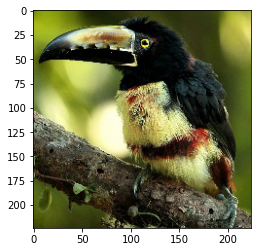

In [3]:
from PIL import Image
from matplotlib import pyplot as plt

img = Image.open('/kaggle/input/iais22-birds/submission_test/submission_test/1071587.jpg')
fig = plt.figure()
plt.imshow(img)

In [4]:
import pytorch_lightning as pl
import torch
import matplotlib.pyplot as plt
import torch.nn.functional as F
from sklearn.datasets import fetch_openml
import numpy as np
from torch.utils.data import DataLoader

In [5]:
class Dataset(torch.utils.data.Dataset):
    def __init__(self, X, y):
        self.X = X
        self.y = y

    def __len__(self):
        return len(self.X)

    def __getitem__(self, ix):
        return torch.tensor(self.X[ix]).float().view(1, 28, 28), torch.tensor(self.y[ix]).long()

class MNISTDataModule(pl.LightningDataModule):

    def __init__(self, batch_size: int = 64):
        super().__init__()
        self.batch_size = batch_size

    def setup(self, stage=None):
        mnist = fetch_openml('mnist_784', version=1)
        X, y = mnist["data"], mnist["target"]
        X_train, X_test, y_train, y_test = X[:60000] / 255., X[60000:] / 255., y[:60000].astype(np.int32), y[60000:].astype(np.int32)
        self.train_ds = Dataset(X_train, y_train)
        self.val_ds = Dataset(X_test, y_test)

    def train_dataloader(self):
        return DataLoader(self.train_ds, batch_size=self.batch_size, shuffle=True)

    def val_dataloader(self):
        return DataLoader(self.val_ds, batch_size=self.batch_size)

In [6]:
from torchvision import datasets, models, transforms
from torch.nn import functional as F
import torch.optim as optim
from torch import nn

In [7]:
# si tienes un hardware con cuda cores,
# puedes cambiar este parametros por "cuda"
device = "cpu"

# cargar el modelo pre-entrenado
# y configurarlo para utilizar el hardware seleccionado previamente
model = models.resnet50(pretrained=True).to(device)

for param in model.parameters():
    param.requires_grad = False

# capa personalizada para adaptarse a nuestro caso particular
model.fc = nn.Sequential(
  nn.Linear(2048, 128),
  nn.ReLU(inplace=True),
  nn.Linear(128, 2)
).to(device)

Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth


  0%|          | 0.00/97.8M [00:00<?, ?B/s]

In [8]:
normalizer = transforms.Normalize(
    [0.5, 0.5, 0.5],
    [0.5, 0.5, 0.5]
  )

transformers = {
    'train': transforms.Compose([
      transforms.Resize((224, 224)),
      transforms.RandomHorizontalFlip(),
      transforms.ToTensor(),
      normalizer
    ]),
    'test': transforms.Compose([
      transforms.Resize((224, 224)),
      transforms.ToTensor(),
      normalizer
    ])
  }

In [9]:
data_set = {
  'train': datasets.ImageFolder('/kaggle/input/iais22-birds/birds/birds', transformers['train']),
  'test': datasets.ImageFolder('/kaggle/input/iais22-birds/submission_test', transformers['test'])
}

In [10]:
data_loaders = {
  'train': torch.utils.data.DataLoader(
    data_set['train'],
    batch_size=32,
    shuffle=True,
    num_workers=2
  ),
  'test': torch.utils.data.DataLoader(
    data_set['test'],
    batch_size=32,
    shuffle=False,
    num_workers=2
  )
}

In [11]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.fc.parameters())

In [12]:
def model_train(phase):
    running_loss = 0.0
    running_corrects = 0.0

    for x, y in data_loaders[phase]:
    # ingresar X y Y en el hardware
        inputs = x.to(device)
        labels = y.to(device)

    # realizar la prediccion
        outputs = model(inputs)
    # medir el error
        loss = criterion(outputs, labels)

    # para fase de train, es necesario
    # efectuar la parte de aprendizaje
        if phase == 'train':
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
    
        _, prediction = torch.max(outputs, 1)
    # medir como va mejorando/empeorando el modelo en esta fase
        running_loss += loss.item() * inputs.size(0)
        running_corrects += torch.sum(prediction == labels.data)
  
  # medir como va mejorando/empeorando el modelo en la iteracion (epoch)
    epoch_loss = running_loss / len(data_set[phase])
    eopch_corrects = running_corrects.double() / len(data_set[phase])

In [13]:
#da error
'''epochs = 10

for epoch in range(epochs):
    for phase in ['train', 'test']:
        model_train(phase)'''

"epochs = 10\n\nfor epoch in range(epochs):\n    for phase in ['train', 'test']:\n        model_train(phase)"

In [14]:
#guardar el modelo
'''torch.save(trained_model.state_dict(), 'path')'''

"torch.save(trained_model.state_dict(), 'path')"